#Different confusion matrix as below:
1. Accuracy
2. Precision (Positive Predictive Value)
3. Recall (Sensitivity or True Positive Rate)
4. Specificity (True Negative Rate)
5. F1 Score
6. False Positive Rate (FPR)
7. False Negative Rate (FNR)
8. Matthews Correlation Coefficient (MCC)
9. Area Under the Receiver Operating Characteristic Curve (ROC-AUC)
10.Cohen's Kappa
11.Balanced Accuracy
12.Logarithmic Loss (Log Loss)

#1. Accuracy:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [7]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

C:\Users\yogesh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [8]:
y_pred1  = clf1.predict(x_test)
y_predict2 = clf2.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score 

In [10]:
print('Accuracy for LogistricRegression:',accuracy_score(y_test,y_pred1))
print('Accuracy of Decision Trees:',accuracy_score(y_test,y_predict2))

Accuracy for LogistricRegression: 0.9016393442622951
Accuracy of Decision Trees: 0.8688524590163934


From the score we can say that the LogisticRegression is good as compare to the Decision tree



#2.Confusion metrics:

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[26,  6],
       [ 0, 29]], dtype=int64)

In [12]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [13]:
print('Classification metrics for LogisticRegression:')
print('-'*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
print(cdf)
print('-'*50)
print('Precision: ',precision_score(y_test,y_pred1))
print('Recall: ',recall_score(y_test,y_pred1))
print('F1_Score: ',f1_score(y_test,y_pred1))

Classification metrics for LogisticRegression:
--------------------------------------------------
    0   1
0  26   6
1   0  29
--------------------------------------------------
Precision:  0.8285714285714286
Recall:  1.0
F1_Score:  0.90625


In [14]:
print('Classification metrics for DicisionTree:')
print('-'*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_predict2),columns=list(range(0,2)))
print(cdf)
print('-'*50)
print('Precision: ',precision_score(y_test,y_predict2))
print('Recall: ',recall_score(y_test,y_predict2))
print('F1_Score: ',f1_score(y_test,y_predict2))

Classification metrics for DicisionTree:
--------------------------------------------------
    0   1
0  25   7
1   1  28
--------------------------------------------------
Precision:  0.8
Recall:  0.9655172413793104
F1_Score:  0.8750000000000001


#Let's check the calculation of classi. metrics for multi-class logistics regresion 

#We will calculate all Precision, Recall, And F1-Score

In [15]:


from sklearn.datasets import load_iris
from sklearn.metrics import classification_report 
iris = load_iris()

In [16]:
x = iris.data # featues 
y = iris.target # target 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
model = LogisticRegression()

In [18]:
model.fit(x_train,y_train)

C:\Users\yogesh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pre = model.predict(x_test)

In [20]:
# Lets see the metrics 
Pre=precision_score(y_test,y_pre,average=None) # average=None gives us the precision for every class
rec=recall_score(y_test,y_pre,average=None)
f1=f1_score(y_test,y_pre,average=None)
print(Pre)
print()
print(rec)
print()
print(f1)

[1. 1. 1.]

[1. 1. 1.]

[1. 1. 1.]


In [21]:
# Lets calculate the one value for the pre,recall and f1 that is nothing but a macro or weighted 
Pre_macro = precision_score(y_test,y_pre,average='macro')
Recall_macro = recall_score(y_test,y_pre,average='macro')
F1_score_macro = f1_score(y_test,y_pre,average='macro')

print(Pre_macro)
print()
print(Recall_macro)
print()
print(F1_score_macro)

1.0

1.0

1.0


In [22]:
# No need to calculate everything seperatly we can directly see the classification_report 
classi_report = classification_report(y_test,y_pre)
print(classi_report)   #  we can see everything here 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Let's check the softmax Regression how it works when there are multiple classes into the target variable 

In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
import matplotlib.pyplot as plt 



In [25]:
iris = sns.load_dataset('iris')

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
encoder = LabelEncoder()
iris['species'] = encoder.fit_transform(iris['species'])

In [29]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
df = iris[['sepal_length','petal_length','species']]

In [32]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [38]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
Log = LogisticRegression(multi_class='multinomial')

In [43]:
Log.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [44]:
y_predi = Log.predict(x_test)

In [46]:
# Accuracy score 

print('Accuracy score: ', accuracy_score(y_test,y_predi))

Accuracy score:  1.0


In [49]:
print('Confusion matrix: \n',pd.DataFrame(confusion_matrix(y_test,y_predi)))

Confusion matrix: 
     0  1   2
0  10  0   0
1   0  9   0
2   0  0  11


#Let's see how the softmax is making predictions 

In [51]:
# Lets give sepal length and petal length and lets see the prediction
query = np.array([[3.4,2.7]])
Log.predict_proba(query)
# Now our model should take out the max value from the array 

C:\Users\yogesh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.09141345e-01, 1.90258451e-01, 6.00204028e-04]])

In [52]:
Log.predict(query)

C:\Users\yogesh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

C:\Users\yogesh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Softmax Regression')

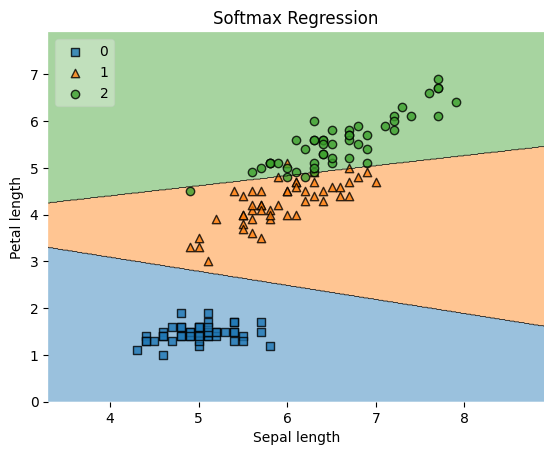

In [56]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values,y.values,Log,legend=2)

plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Softmax Regression')

#We can see the clear classification of all three classes 